<a href="https://www.kaggle.com/code/arnabmukherjee853/cifer10-cnn?scriptVersionId=195341945" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tensorflow.keras.layers import Input, Flatten, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D, Dense, Dropout, Conv2D
from tensorflow.keras.models import Model

In [6]:
cifar10 = tf.keras.datasets.cifar10
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()
Xtrain, Xtest = Xtrain/255.0, Xtest/255
Ytrain, Ytest = Ytrain.flatten(), Ytest.flatten()
print("Xtrain shape: ", Xtrain.shape)
print("Xtest shape: ", Xtest.shape)
print("Ytrain shape: ", Ytrain.shape)
print("Ytest shape: ", Ytest.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Xtrain shape:  (50000, 32, 32, 3)
Xtest shape:  (10000, 32, 32, 3)
Ytrain shape:  (50000,)
Ytest shape:  (10000,)


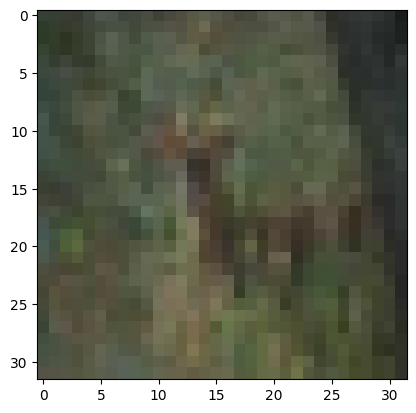

In [7]:
plt.imshow(Xtrain[10])
plt.show()

In [8]:
L = len(set(Ytrain))
print("No of Predictive classes: ", L)

No of Predictive classes:  10


In [9]:
from tensorflow.keras.callbacks import LearningRateScheduler
def Scheduler(epoch,lr):
    lr1 = lr * 0.1
    lr2 = lr1 * 0.1
    if epoch < 10:
        return lr
    elif 11 <= epoch < 25:
        return lr1
    else:
        return lr2

i = Input(shape=Xtrain[0].shape)
x = Conv2D(32,(3,3),strides=(2,2), padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3), strides=(2,2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64,(3,3),strides=(2,2),  padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3), strides=(2,2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3), strides=(2,2), padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3), strides=(2,2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(L, activation='softmax')(x)

model = Model(i,x)

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
lr_scheduler = LearningRateScheduler(Scheduler)
R = model.fit(Xtrain, Ytrain, validation_data = (Xtest, Ytest),
              callbacks=lr_scheduler,
              epochs=35)

Epoch 1/35
  33/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1957 - loss: 4.3680

I0000 00:00:1725477433.555088     115 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1725477433.579282     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4110 - loss: 1.8256

W0000 00:00:1725477443.369742     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1725477444.599514     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4111 - loss: 1.8254 - val_accuracy: 0.4861 - val_loss: 1.4617 - learning_rate: 0.0010
Epoch 2/35
  34/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5416 - loss: 1.2566

W0000 00:00:1725477445.692525     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5827 - loss: 1.1774 - val_accuracy: 0.6167 - val_loss: 1.0951 - learning_rate: 0.0010
Epoch 3/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6483 - loss: 1.0087 - val_accuracy: 0.6178 - val_loss: 1.0758 - learning_rate: 0.0010
Epoch 4/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6927 - loss: 0.8778 - val_accuracy: 0.6457 - val_loss: 1.0219 - learning_rate: 0.0010
Epoch 5/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7289 - loss: 0.7732 - val_accuracy: 0.6679 - val_loss: 0.9562 - learning_rate: 0.0010
Epoch 6/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7637 - loss: 0.6711 - val_accuracy: 0.6731 - val_loss: 0.9579 - learning_rate: 0.0010
Epoch 7/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7942 - loss: 0.5874 - val_accuracy: 0.6538 - val_loss: 1.0318 - learning_rate: 0.0010
Epoch 8/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8256 - loss: 0.4991

In [13]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1,
                                                                height_shift_range = 0.1,
                                                                horizontal_flip = True,
                                                                vertical_flip = True)
train_generator = data_generator.flow(Xtrain, Ytrain, batch_size)
steps_per_epoch = Xtrain.shape[0]//batch_size
R = model.fit(train_generator, validation_data = (Xtest, Ytest), steps_per_epoch = steps_per_epoch, epochs= 15)

Epoch 1/15
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 4:46 183ms/step - accuracy: 0.6250 - loss: 1.6969

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4768 - loss: 2.4982 - val_accuracy: 0.7080 - val_loss: 1.0757
Epoch 2/15
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4062 - loss: 2.3996

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - accuracy: 0.4062 - loss: 2.3996 - val_accuracy: 0.7081 - val_loss: 1.0757
Epoch 3/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4752 - loss: 2.5352 - val_accuracy: 0.7078 - val_loss: 1.0767
Epoch 4/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.5938 - loss: 1.6896 - val_accuracy: 0.7079 - val_loss: 1.0762
Epoch 5/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4742 - loss: 2.5103 - val_accuracy: 0.7083 - val_loss: 1.0751
Epoch 6/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.3750 - loss: 2.7185 - val_accuracy: 0.7081 - val_loss: 1.0750
Epoch 7/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4725 - loss: 2.5168 - val_accuracy: 0.7081 - val_loss: 1.0740
Epoch 8/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - accuracy: 0.5625 - loss: 2.9455 - val_accuracy: 0.7084 - val_loss: 1.0738
Epoch 9/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4752 - loss: 2.50

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
P_test = model.predict(Xtest).argmax(axis = 1)
print(confusion_matrix(Ytest, P_test))
print(classification_report(Ytest, P_test))

 99/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1725478082.382574     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


W0000 00:00:1725478083.250895     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[[753  27  47  12  15  10  13  13  47  63]
 [ 15 825   5   5   1   3   9   3  17 117]
 [ 61   5 552  49  90  53 114  40  13  23]
 [ 20  17  58 451  70 179 112  41  19  33]
 [ 25   4  45  44 626  36 103  93  11  13]
 [ 15   7  36 146  40 595  64  67   9  21]
 [  7  10  28  24  20  24 861   9   6  11]
 [ 12   7  21  29  49  48  11 783   5  35]
 [ 72  48   8  11   4   3   6   3 808  37]
 [ 30  92   5   4   0   3   4  15  23 824]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1000
           1       0.79      0.82      0.81      1000
           2       0.69      0.55      0.61      1000
           3       0.58      0.45      0.51      1000
           4       0.68      0.63      0.65      1000
           5       0.62      0.59      0.61      1000
           6       0.66      0.86      0.75      1000
           7       0.73      0.78      0.76      1000
           8       0.84      0.81      0.83      1000
           9       0.70     

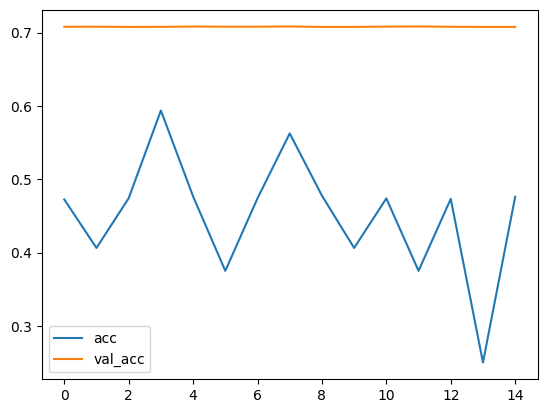

In [15]:
plt.plot(R.history['accuracy'], label='acc')
plt.plot(R.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

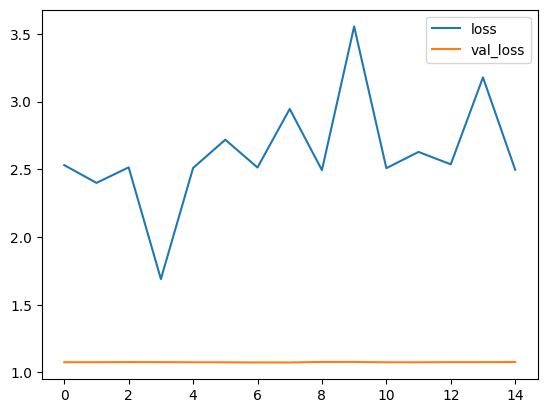

In [16]:
plt.plot(R.history['loss'], label='loss')
plt.plot(R.history['val_loss'], label='val_loss')
plt.legend()
plt.show()